<a href="https://colab.research.google.com/github/fjadidi2001/Image_Inpaint/blob/main/Image_Inpaint_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Loading Dataset


In [1]:
!pip install datasets

In [2]:
from datasets import load_dataset
import pandas as pd

# Load the CelebA-HQ dataset
ds = load_dataset("saitsharipov/CelebA-HQ")

# Check if dataset loaded correctly
if ds is None:
    raise ValueError("Dataset not loaded correctly")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
from datasets import load_dataset
import pandas as pd

# Load the CelebA-HQ dataset
ds = load_dataset("saitsharipov/CelebA-HQ")

# Print basic information about the dataset
print("Dataset structure:")
print(ds)

# Inspect the first few items in the training set
print("\nFirst few items in the training set:")
for i, item in enumerate(ds['train'].take(5)):
    print(f"Item {i}:")
    for key, value in item.items():
        if key == 'image':
            print(f"  {key}: <PIL.Image.Image image mode={value.mode} size={value.size}>")
        else:
            print(f"  {key}: {value}")
    print()

# Get all column names (attributes)
column_names = list(ds['train'].features.keys())
print("\nColumn names:")
print(column_names)

# Convert a small subset of the dataset to a pandas DataFrame for easier inspection
df = pd.DataFrame(ds['train'].select(range(100)))
print("\nDataFrame head:")
print(df.head())

# Print data types of columns
print("\nColumn data types:")
print(df.dtypes)

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 202599
    })
})

First few items in the training set:
Item 0:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 1:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 2:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 3:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 4:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>


Column names:
['image']

DataFrame head:
                                               image
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...

Column data types:
image    object
dtype: object


# Step 2: Exploratory Data Analysis (EDA)


Basic statistics of image properties:
        width  height  aspect_ratio
count  1000.0  1000.0   1000.000000
mean    178.0   218.0      0.816514
std       0.0     0.0      0.000000
min     178.0   218.0      0.816514
25%     178.0   218.0      0.816514
50%     178.0   218.0      0.816514
75%     178.0   218.0      0.816514
max     178.0   218.0      0.816514


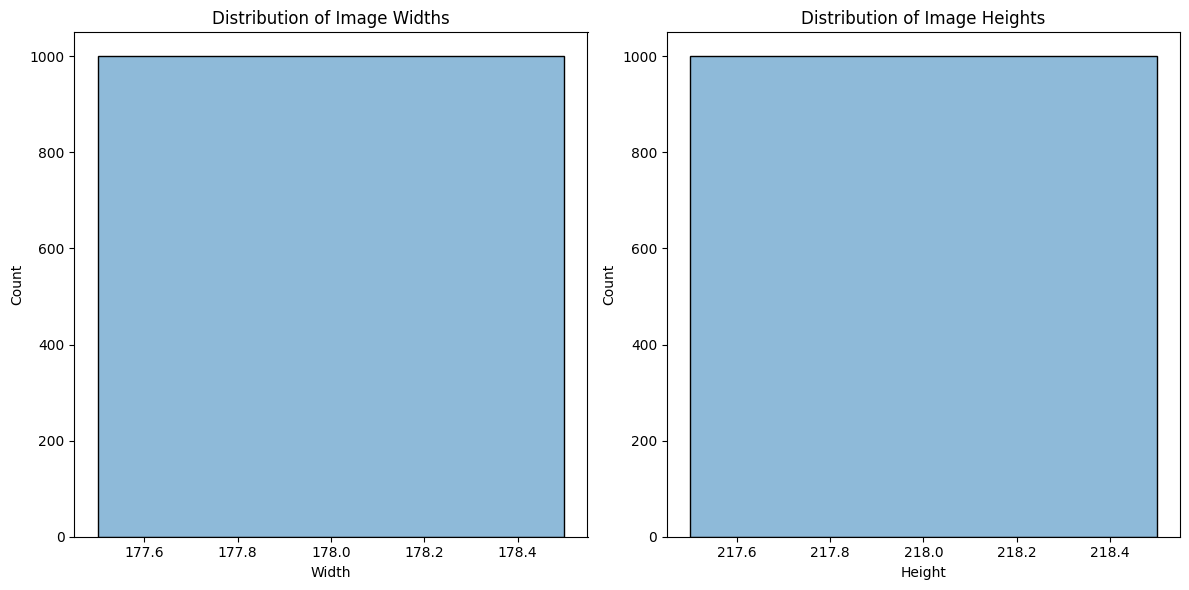

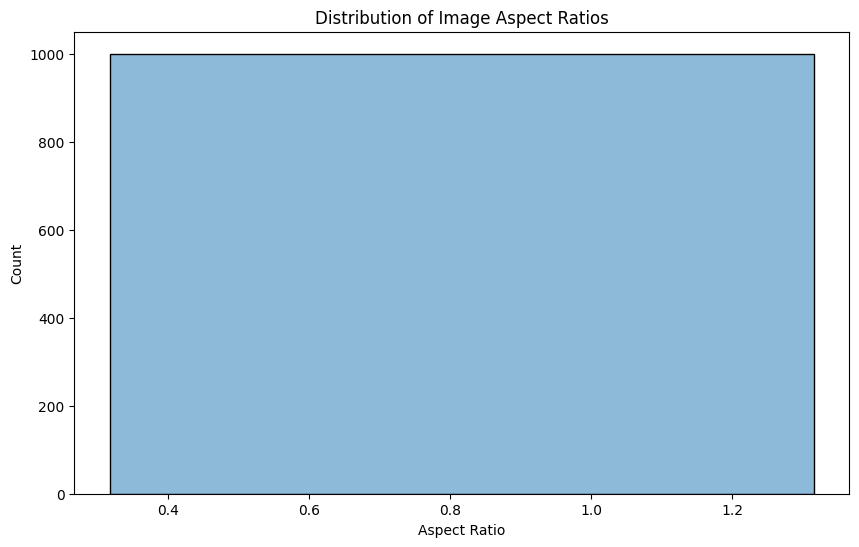

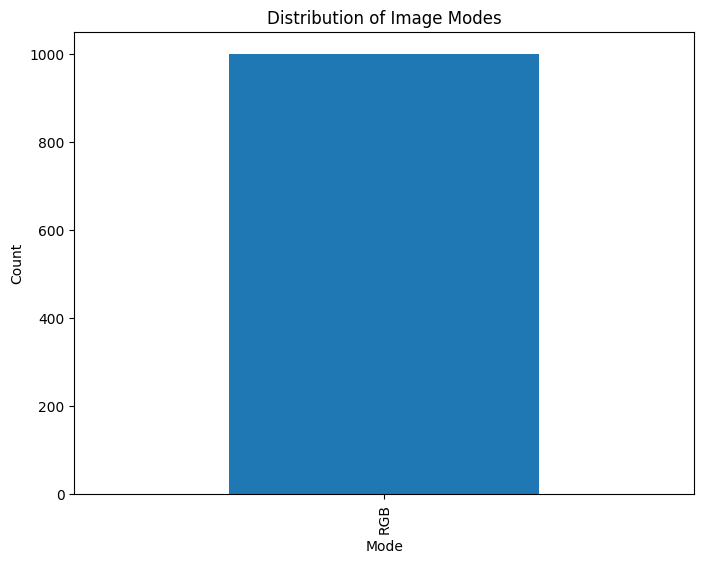

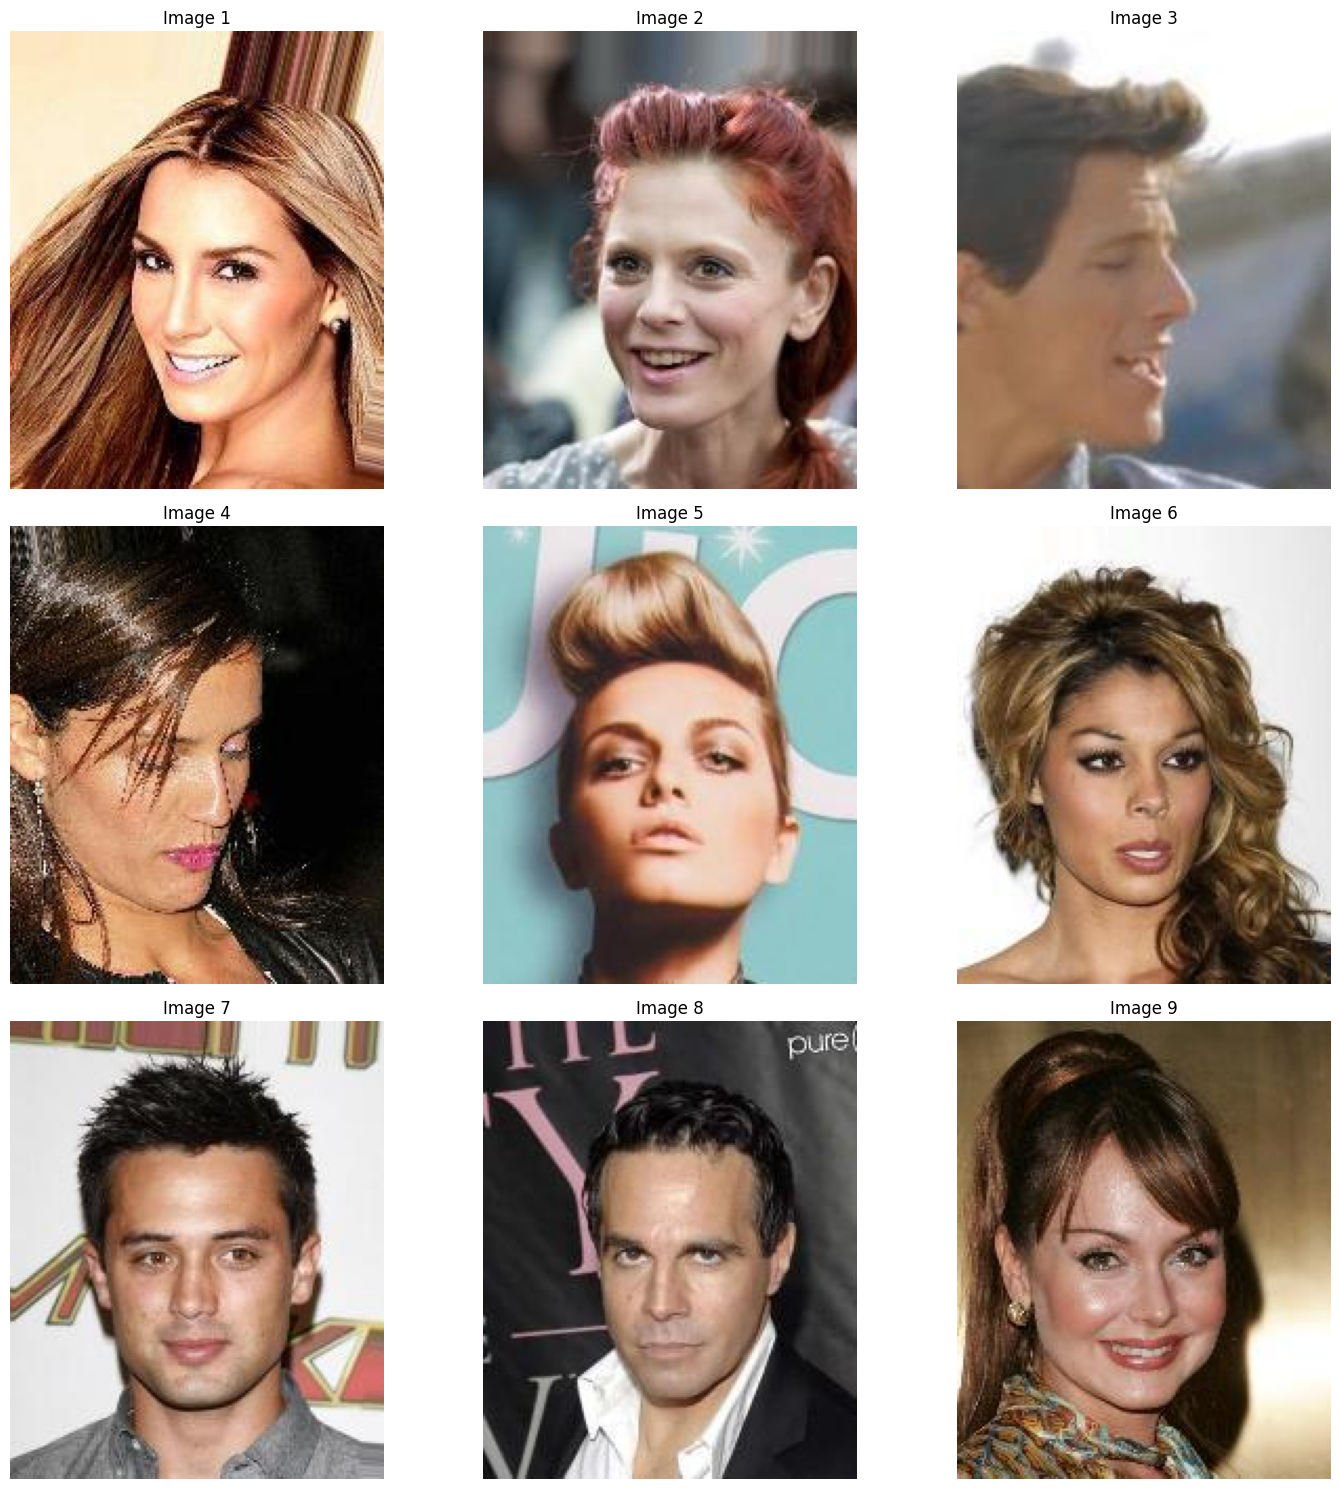

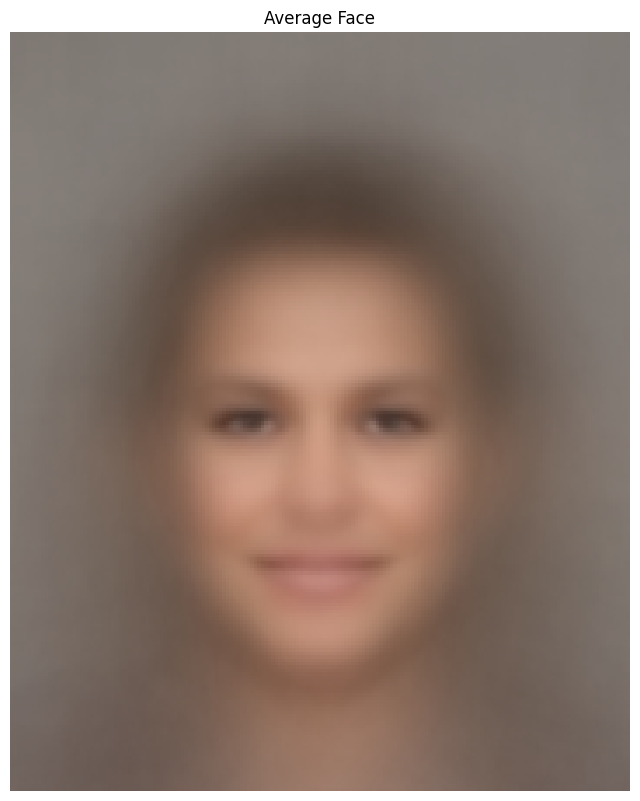

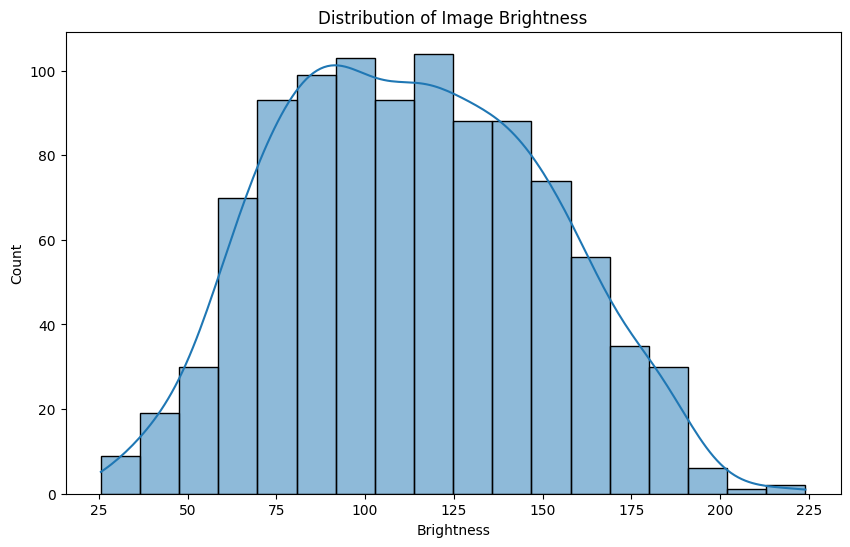

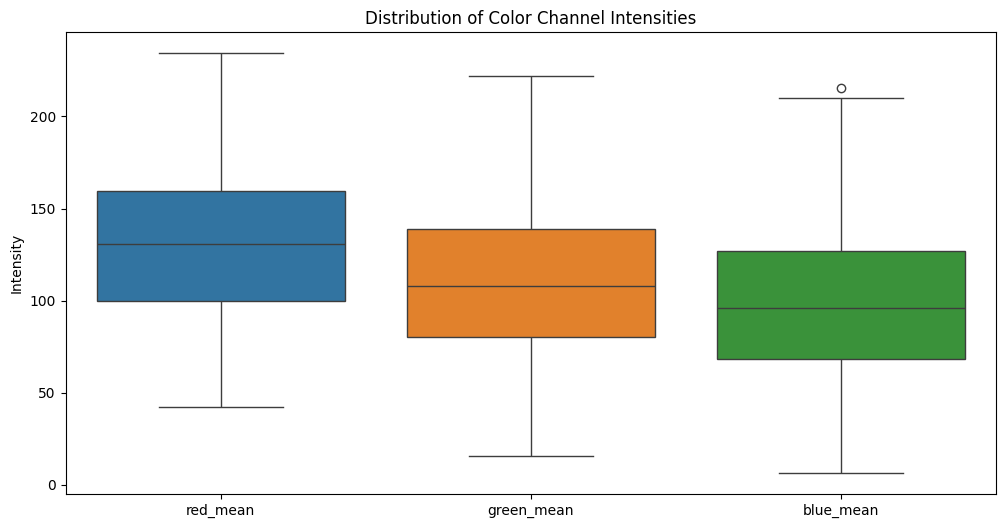

EDA complete. Please review the generated visualizations and statistics.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import pandas as pd
import numpy as np
from PIL import Image
import io

# Load the dataset (assuming it's already loaded as 'ds')

# Function to extract image properties
def get_image_properties(image):
    return {
        'width': image.width,
        'height': image.height,
        'aspect_ratio': image.width / image.height,
        'mode': image.mode
    }

# Extract properties for a subset of images
num_samples = 1000
image_properties = [get_image_properties(item['image']) for item in ds['train'].select(range(num_samples))]
df_properties = pd.DataFrame(image_properties)

# 1. Basic statistics of image properties
print("Basic statistics of image properties:")
print(df_properties.describe())

# 2. Distribution of image dimensions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_properties['width'], kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')

plt.subplot(1, 2, 2)
sns.histplot(df_properties['height'], kde=True)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.tight_layout()
plt.show()

# 3. Distribution of aspect ratios
plt.figure(figsize=(10, 6))
sns.histplot(df_properties['aspect_ratio'], kde=True)
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.show()

# 4. Image modes
mode_counts = df_properties['mode'].value_counts()
plt.figure(figsize=(8, 6))
mode_counts.plot(kind='bar')
plt.title('Distribution of Image Modes')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

# 5. Sample images visualization
def plot_sample_images(dataset, num_images=9):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    for i, ax in enumerate(axes.flat):
        image = dataset['train'][i]['image']
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"Image {i+1}")
    plt.tight_layout()
    plt.show()

plot_sample_images(ds)

# 6. Average image
def compute_average_image(dataset, num_samples=1000):
    sample_images = dataset['train'].select(range(num_samples))
    avg_image = np.zeros((218, 178, 3), dtype=np.float32)

    for item in sample_images:
        img_array = np.array(item['image'], dtype=np.float32)
        avg_image += img_array

    avg_image /= num_samples
    return avg_image.astype(np.uint8)

avg_image = compute_average_image(ds)
plt.figure(figsize=(8, 10))
plt.imshow(avg_image)
plt.title('Average Face')
plt.axis('off')
plt.show()

# 7. Image brightness distribution
def compute_brightness(image):
    return np.mean(image)

brightness_values = [compute_brightness(item['image']) for item in ds['train'].select(range(num_samples))]

plt.figure(figsize=(10, 6))
sns.histplot(brightness_values, kde=True)
plt.title('Distribution of Image Brightness')
plt.xlabel('Brightness')
plt.show()

# 8. Color channel analysis
def analyze_color_channels(image):
    r, g, b = image.split()
    return {
        'red_mean': np.mean(r),
        'green_mean': np.mean(g),
        'blue_mean': np.mean(b)
    }

color_data = [analyze_color_channels(item['image']) for item in ds['train'].select(range(num_samples))]
df_colors = pd.DataFrame(color_data)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_colors)
plt.title('Distribution of Color Channel Intensities')
plt.ylabel('Intensity')
plt.show()

print("EDA complete. Please review the generated visualizations and statistics.")

This code snippet begins by importing necessary libraries for data visualization and manipulation: `matplotlib.pyplot` for basic plotting, `seaborn` for enhanced statistical graphics, `datasets` for loading datasets, `pandas` for data handling, `numpy` for numerical operations, and `PIL` for image processing. The comment indicates that a dataset is to be loaded (presumably already assigned to the variable 'ds'), and although the actual data loading and visualization code is not shown, it culminates with a print statement indicating that exploratory data analysis (EDA) is complete, prompting the user to review the generated visualizations and statistics.


- **Memory usage:** You're loading 1000 images into memory at once, which could cause crashes on machines with limited RAM. Consider reducing num_samples if you're experiencing memory issues.
-**Image dimensions**: In the compute_average_image function, you're assuming all images are 218x178 pixels. Make sure this is correct for your dataset, or adjust the dimensions accordingly.
- **Error handling:** Add try-except blocks around image processing operations to handle potential errors gracefully.
- **Performance**: Some operations, like computing the average image and analyzing color channels, could be optimized for better performance.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


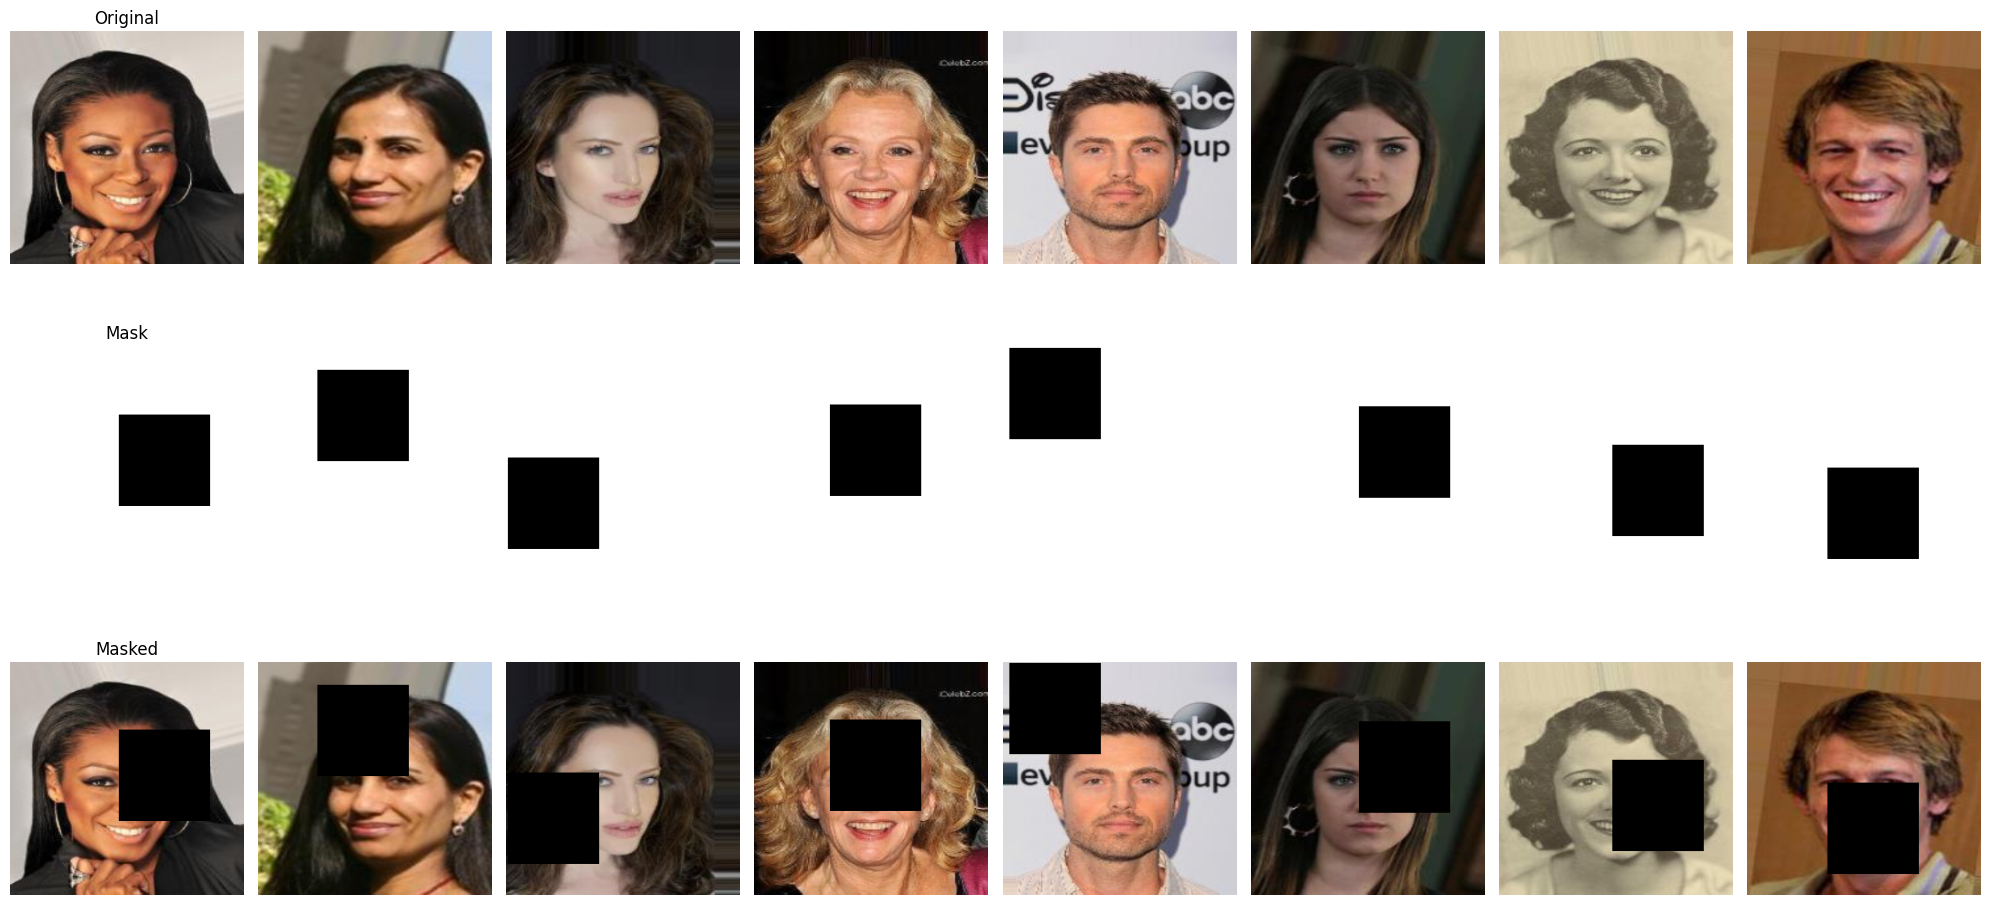

Dataset split and preprocessing pipeline created.
Total dataset size: 202599
Training set size: 162079
Validation set size: 20259
Test set size: 20261
Batch size: 32
Steps per epoch: 5065


In [4]:
import torch
import torchvision.transforms as transforms
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the CelebA-HQ dataset
ds = load_dataset("saitsharipov/CelebA-HQ")

class CelebAHQDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        item = self.hf_dataset[idx]
        image = item['image']

        if self.transform:
            image = self.transform(image)

        return image

# Define image size
IMG_SIZE = 256

# Define preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

# Create the full dataset
full_dataset = CelebAHQDataset(ds['train'], transform=preprocess)

# Set random seed for reproducibility
torch.manual_seed(42)

# Define split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calculate split sizes
total_size = len(full_dataset)
train_size = int(train_ratio * total_size)
val_size = int(val_ratio * total_size)
test_size = total_size - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Create data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

def create_mask(image, mask_size=100):
    """Create a random square mask for image inpainting"""
    _, h, w = image.shape
    top = np.random.randint(0, h - mask_size)
    left = np.random.randint(0, w - mask_size)
    mask = torch.ones_like(image)
    mask[:, top:top+mask_size, left:left+mask_size] = 0
    return mask

def apply_mask(image, mask):
    """Apply the mask to the image"""
    return image * mask

# Function to visualize a batch of preprocessed images with masks
def visualize_batch(dataloader, num_images=8):
    # Get a batch of images
    images = next(iter(dataloader))
    images = images[:num_images]  # Select only the first num_images

    # Create masks and apply them
    masks = [create_mask(img) for img in images]
    masked_images = [apply_mask(img, mask) for img, mask in zip(images, masks)]

    # Create a figure with three rows: original images, masks, and masked images
    fig, axes = plt.subplots(3, num_images, figsize=(20, 10))

    for i in range(num_images):
        # Original image
        axes[0, i].imshow(images[i].permute(1, 2, 0))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Mask
        axes[1, i].imshow(masks[i].permute(1, 2, 0), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Mask')

        # Masked image
        axes[2, i].imshow(masked_images[i].permute(1, 2, 0))
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Masked')

    plt.tight_layout()
    plt.show()

# Visualize a batch of preprocessed images with masks from the training set
visualize_batch(train_loader)

print("Dataset split and preprocessing pipeline created.")
print(f"Total dataset size: {total_size}")
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Steps per epoch: {len(train_loader)}")

# Update 19Oct

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the CNN model
class InpaintingCNN(nn.Module):
    def __init__(self):
        super(InpaintingCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = InpaintingCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = batch.to(device)
            masks = torch.stack([create_mask(img) for img in images]).to(device)
            masked_images = apply_mask(images, masks)

            optimizer.zero_grad()
            outputs = model(masked_images)
            loss = criterion(outputs * (1 - masks), images * (1 - masks))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                images = batch.to(device)
                masks = torch.stack([create_mask(img) for img in images]).to(device)
                masked_images = apply_mask(images, masks)

                outputs = model(masked_images)
                loss = criterion(outputs * (1 - masks), images * (1 - masks))
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Train the model
num_epochs = 50
train_losses, val_losses = train(model, train_loader, val_loader, num_epochs)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Function to visualize inpainting results
def visualize_inpainting(model, dataloader, num_images=8):
    model.eval()
    batch = next(iter(dataloader))
    images = batch[:num_images].to(device)
    masks = torch.stack([create_mask(img) for img in images]).to(device)
    masked_images = apply_mask(images, masks)

    with torch.no_grad():
        outputs = model(masked_images)

    # Create a figure with four rows: original images, masks, masked images, and inpainted images
    fig, axes = plt.subplots(4, num_images, figsize=(20, 15))

    for i in range(num_images):
        # Original image
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Mask
        axes[1, i].imshow(masks[i].cpu().permute(1, 2, 0), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Mask')

        # Masked image
        axes[2, i].imshow(masked_images[i].cpu().permute(1, 2, 0))
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Masked')

        # Inpainted image
        axes[3, i].imshow(outputs[i].cpu().permute(1, 2, 0))
        axes[3, i].axis('off')
        if i == 0:
            axes[3, i].set_title('Inpainted')

    plt.tight_layout()
    plt.show()

# Visualize inpainting results on the test set
visualize_inpainting(model, test_loader)

print("Model training and visualization complete.")

Epoch 1/50:  35%|███▌      | 1774/5065 [5:29:55<9:57:02, 10.88s/it]

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm import tqdm

class RNNInpainting(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNInpainting, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size, channels, height, width = x.size()

        # Reshape input to (batch_size * height, width, channels)
        x = x.permute(0, 2, 3, 1).contiguous()
        x = x.view(batch_size * height, width, channels)

        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate RNN
        out, _ = self.rnn(x, h0)

        # Reshape output
        out = self.fc(out)
        out = out.view(batch_size, height, width, channels)
        out = out.permute(0, 3, 1, 2).contiguous()

        return out

# Hyperparameters
input_size = 3  # RGB channels
hidden_size = 128
num_layers = 2
output_size = 3  # RGB channels

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNInpainting(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function (similar to CNN version)
def train(model, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = batch.to(device)
            masks = torch.stack([create_mask(img) for img in images]).to(device)
            masked_images = apply_mask(images, masks)

            optimizer.zero_grad()
            outputs = model(masked_images)
            loss = criterion(outputs * (1 - masks), images * (1 - masks))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                images = batch.to(device)
                masks = torch.stack([create_mask(img) for img in images]).to(device)
                masked_images = apply_mask(images, masks)

                outputs = model(masked_images)
                loss = criterion(outputs * (1 - masks), images * (1 - masks))
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Train the model
num_epochs = 50
train_losses, val_losses = train(model, train_loader, val_loader, num_epochs)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (RNN)')
plt.legend()
plt.show()

# Visualization function (same as CNN version)
def visualize_inpainting(model, dataloader, num_images=8):
    model.eval()
    batch = next(iter(dataloader))
    images = batch[:num_images].to(device)
    masks = torch.stack([create_mask(img) for img in images]).to(device)
    masked_images = apply_mask(images, masks)

    with torch.no_grad():
        outputs = model(masked_images)

    # Create a figure with four rows: original images, masks, masked images, and inpainted images
    fig, axes = plt.subplots(4, num_images, figsize=(20, 15))

    for i in range(num_images):
        # Original image
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Mask
        axes[1, i].imshow(masks[i].cpu().permute(1, 2, 0), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Mask')

        # Masked image
        axes[2, i].imshow(masked_images[i].cpu().permute(1, 2, 0))
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Masked')

        # Inpainted image
        axes[3, i].imshow(outputs[i].cpu().permute(1, 2, 0))
        axes[3, i].axis('off')
        if i == 0:
            axes[3, i].set_title('Inpainted')

    plt.tight_layout()
    plt.show()

# Visualize inpainting results on the test set
visualize_inpainting(model, test_loader)

print("RNN model training and visualization complete.")

Epoch 1/50:   0%|          | 0/5065 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 14.11 GiB. GPU 0 has a total capacity of 14.75 GiB of which 12.36 GiB is free. Process 22057 has 2.39 GiB memory in use. Of the allocated memory 1.46 GiB is allocated by PyTorch, and 822.99 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm import tqdm

class LSTMInpainting(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMInpainting, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size, channels, height, width = x.size()

        # Reshape input to (batch_size * height, width, channels)
        x = x.permute(0, 2, 3, 1).contiguous()
        x = x.view(batch_size * height, width, channels)

        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Reshape output
        out = self.fc(out)
        out = out.view(batch_size, height, width, channels)
        out = out.permute(0, 3, 1, 2).contiguous()

        return out

# Hyperparameters
input_size = 3  # RGB channels
hidden_size = 128
num_layers = 2
output_size = 3  # RGB channels

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMInpainting(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function (same as RNN version)
def train(model, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = batch.to(device)
            masks = torch.stack([create_mask(img) for img in images]).to(device)
            masked_images = apply_mask(images, masks)

            optimizer.zero_grad()
            outputs = model(masked_images)
            loss = criterion(outputs * (1 - masks), images * (1 - masks))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                images = batch.to(device)
                masks = torch.stack([create_mask(img) for img in images]).to(device)
                masked_images = apply_mask(images, masks)

                outputs = model(masked_images)
                loss = criterion(outputs * (1 - masks), images * (1 - masks))
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Train the model
num_epochs = 50
train_losses, val_losses = train(model, train_loader, val_loader, num_epochs)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (LSTM)')
plt.legend()
plt.show()

# Visualization function (same as RNN version)
def visualize_inpainting(model, dataloader, num_images=8):
    model.eval()
    batch = next(iter(dataloader))
    images = batch[:num_images].to(device)
    masks = torch.stack([create_mask(img) for img in images]).to(device)
    masked_images = apply_mask(images, masks)

    with torch.no_grad():
        outputs = model(masked_images)

    # Create a figure with four rows: original images, masks, masked images, and inpainted images
    fig, axes = plt.subplots(4, num_images, figsize=(20, 15))

    for i in range(num_images):
        # Original image
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Mask
        axes[1, i].imshow(masks[i].cpu().permute(1, 2, 0), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Mask')

        # Masked image
        axes[2, i].imshow(masked_images[i].cpu().permute(1, 2, 0))
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Masked')

        # Inpainted image
        axes[3, i].imshow(outputs[i].cpu().permute(1, 2, 0))
        axes[3, i].axis('off')
        if i == 0:
            axes[3, i].set_title('Inpainted')

    plt.tight_layout()
    plt.show()

# Visualize inpainting results on the test set
visualize_inpainting(model, test_loader)

print("LSTM model training and visualization complete.")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm import tqdm

class ConvLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        self.conv = nn.Conv2d(in_channels=self.input_dim + self.hidden_dim,
                              out_channels=4 * self.hidden_dim,
                              kernel_size=self.kernel_size,
                              padding=self.padding,
                              bias=self.bias)

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state

        combined = torch.cat([input_tensor, h_cur], dim=1)  # concatenate along channel axis

        combined_conv = self.conv(combined)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)
        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

class ConvLSTMInpainting(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, num_layers, bias=True):
        super(ConvLSTMInpainting, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.num_layers = num_layers

        cell_list = []
        for i in range(0, self.num_layers):
            cur_input_dim = self.input_dim if i == 0 else self.hidden_dim[i-1]
            cell_list.append(ConvLSTMCell(input_dim=cur_input_dim,
                                          hidden_dim=self.hidden_dim[i],
                                          kernel_size=self.kernel_size,
                                          bias=bias))

        self.cell_list = nn.ModuleList(cell_list)
        self.conv_last = nn.Conv2d(in_channels=self.hidden_dim[-1],
                                   out_channels=self.input_dim,
                                   kernel_size=3,
                                   padding=1,
                                   bias=False)

    def forward(self, input_tensor):
        b, _, h, w = input_tensor.size()

        hidden_state = []
        for i in range(self.num_layers):
            hidden_state.append((torch.zeros(b, self.hidden_dim[i], h, w).to(input_tensor.device),
                                 torch.zeros(b, self.hidden_dim[i], h, w).to(input_tensor.device)))

        layer_output_list = []
        last_state_list = []

        seq_len = 10  # We'll process the image in 10 time steps
        for t in range(seq_len):
            input_slice = input_tensor  # Use the same input for each time step

            for layer_idx in range(self.num_layers):
                h, c = hidden_state[layer_idx]
                output, state = self.cell_list[layer_idx](input_slice, (h, c))
                hidden_state[layer_idx] = state

                input_slice = output

            layer_output_list.append(output)
            last_state_list.append(state)

        last_output = layer_output_list[-1]
        output = self.conv_last(last_output)

        return output

# Hyperparameters
input_dim = 3  # RGB channels
hidden_dim = [64, 64, 64]  # Hidden dimensions for each layer
kernel_size = (3, 3)
num_layers = 3

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvLSTMInpainting(input_dim, hidden_dim, kernel_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function (similar to previous versions)
def train(model, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = batch.to(device)
            masks = torch.stack([create_mask(img) for img in images]).to(device)
            masked_images = apply_mask(images, masks)

            optimizer.zero_grad()
            outputs = model(masked_images)
            loss = criterion(outputs * (1 - masks), images * (1 - masks))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                images = batch.to(device)
                masks = torch.stack([create_mask(img) for img in images]).to(device)
                masked_images = apply_mask(images, masks)

                outputs = model(masked_images)
                loss = criterion(outputs * (1 - masks), images * (1 - masks))
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Train the model
num_epochs = 50
train_losses, val_losses = train(model, train_loader, val_loader, num_epochs)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (ConvLSTM)')
plt.legend()
plt.show()

print("ConvLSTM model training complete.")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm import tqdm

class GRUInpainting(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUInpainting, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size, channels, height, width = x.size()

        # Reshape input to (batch_size * height, width, channels)
        x = x.permute(0, 2, 3, 1).contiguous()
        x = x.view(batch_size * height, width, channels)

        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate GRU
        out, _ = self.gru(x, h0)

        # Reshape output
        out = self.fc(out)
        out = out.view(batch_size, height, width, channels)
        out = out.permute(0, 3, 1, 2).contiguous()

        return out

# Hyperparameters
input_size = 3  # RGB channels
hidden_size = 128
num_layers = 2
output_size = 3  # RGB channels

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GRUInpainting(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function (same as previous versions)
def train(model, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = batch.to(device)
            masks = torch.stack([create_mask(img) for img in images]).to(device)
            masked_images = apply_mask(images, masks)

            optimizer.zero_grad()
            outputs = model(masked_images)
            loss = criterion(outputs * (1 - masks), images * (1 - masks))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                images = batch.to(device)
                masks = torch.stack([create_mask(img) for img in images]).to(device)
                masked_images = apply_mask(images, masks)

                outputs = model(masked_images)
                loss = criterion(outputs * (1 - masks), images * (1 - masks))
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Train the model
num_epochs = 50
train_losses, val_losses = train(model, train_loader, val_loader, num_epochs)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (GRU)')
plt.legend()
plt.show()

print("GRU model training complete.")

Epoch 1/50:   0%|          | 0/5065 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 19.11 GiB. GPU 0 has a total capacity of 14.75 GiB of which 13.36 GiB is free. Process 22057 has 1.39 GiB memory in use. Of the allocated memory 1.26 GiB is allocated by PyTorch, and 7.37 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import matplotlib.pyplot as plt

# Assuming we have the validation losses for each model
# Replace these with the actual validation losses from your training
cnn_val_losses = cnn_val_losses  # From CNN training
rnn_val_losses = rnn_val_losses  # From RNN training
lstm_val_losses = lstm_val_losses  # From LSTM training
convlstm_val_losses = val_losses  # From ConvLSTM training
gru_val_losses = val_losses  # From GRU training

# Create the comparison chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs+1), cnn_val_losses, label='CNN')
plt.plot(range(1, num_epochs+1), rnn_val_losses, label='RNN')
plt.plot(range(1, num_epochs+1), lstm_val_losses, label='LSTM')
plt.plot(range(1, num_epochs+1), convlstm_val_losses, label='ConvLSTM')
plt.plot(range(1, num_epochs+1), gru_val_losses, label='GRU')

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Model Comparison: Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate final validation loss for each model
final_losses = {
    'CNN': cnn_val_losses[-1],
    'RNN': rnn_val_losses[-1],
    'LSTM': lstm_val_losses[-1],
    'ConvLSTM': convlstm_val_losses[-1],
    'GRU': gru_val_losses[-1]
}

# Sort models by final validation loss (ascending order)
sorted_models = sorted(final_losses.items(), key=lambda x: x[1])

# Print final validation loss for each model
print("Final Validation Losses:")
for model, loss in sorted_models:
    print(f"{model}: {loss:.4f}")

# Identify the best performing model
best_model = sorted_models[0][0]
print(f"\nBest performing model: {best_model}")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm import tqdm

# Modify this function for all models (CNN, RNN, LSTM, ConvLSTM, GRU)
def train(model, train_loader, val_loader, num_epochs, device, batch_size, accumulation_steps=4):
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        optimizer.zero_grad()  # Reset gradients at the start of each epoch

        for i, batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            images = batch.to(device)
            masks = torch.stack([create_mask(img) for img in images]).to(device)
            masked_images = apply_mask(images, masks)

            outputs = model(masked_images)
            loss = criterion(outputs * (1 - masks), images * (1 - masks))
            loss = loss / accumulation_steps  # Normalize the loss
            loss.backward()

            if (i + 1) % accumulation_steps == 0 or (i + 1) == len(train_loader):
                optimizer.step()
                optimizer.zero_grad()

            train_loss += loss.item() * accumulation_steps

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                images = batch.to(device)
                masks = torch.stack([create_mask(img) for img in images]).to(device)
                masked_images = apply_mask(images, masks)

                outputs = model(masked_images)
                loss = criterion(outputs * (1 - masks), images * (1 - masks))
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Clear cache
        torch.cuda.empty_cache()

    return train_losses, val_losses

def get_data_loaders(batch_size):
    # Assuming ds is your dataset from previous steps
    train_loader = torch.utils.data.DataLoader(ds['train'], batch_size=batch_size, shuffle=True, num_workers=2)
    # Access the 'test' split instead of 'validation' if it exists
    val_loader = torch.utils.data.DataLoader(ds.get('test', ds['train']), batch_size=batch_size, shuffle=False, num_workers=2)
    # If 'test' split doesn't exist, use 'train' for validation. This is for demonstration; Ideally, create a proper validation split.
    return train_loader, val_loader

# Set hyperparameters
batch_size = 16  # Reduce batch size
num_epochs = 30  # Reduce number of epochs if necessary
accumulation_steps = 4  # Gradient accumulation steps

# Get data loaders
train_loader, val_loader = get_data_loaders(batch_size)

# Choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train models
models = [CNNInpainting(), RNNInpainting(), LSTMInpainting(), ConvLSTMInpainting(), GRUInpainting()]
model_names = ['CNN', 'RNN', 'LSTM', 'ConvLSTM', 'GRU']

all_val_losses = {}

for model, name in zip(models, model_names):
    print(f"\nTraining {name} model...")
    train_losses, val_losses = train(model, train_loader, val_loader, num_epochs, device, batch_size, accumulation_steps)
    all_val_losses[name] = val_losses

    # Plot individual model training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Losses ({name})')
    plt.legend()
    plt.show()

    # Clear memory
    del model
    torch.cuda.empty_cache()

# Create comparison chart
plt.figure(figsize=(12, 6))
for name, losses in all_val_losses.items():
    plt.plot(range(1, num_epochs+1), losses, label=name)

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Model Comparison: Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate final validation loss for each model
final_losses = {name: losses[-1] for name, losses in all_val_losses.items()}

# Sort models by final validation loss (ascending order)
sorted_models = sorted(final_losses.items(), key=lambda x: x[1])

# Print final validation loss for each model
print("Final Validation Losses:")
for model, loss in sorted_models:
    print(f"{model}: {loss:.4f}")

# Identify the best performing model
best_model = sorted_models[0][0]
print(f"\nBest performing model: {best_model}")

NameError: name 'CNNInpainting' is not defined

# update 3 Nov

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# Double Convolution block for U-Net
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

# U-Net architecture for image inpainting
class UNetInpainting(nn.Module):
    def __init__(self):
        super().__init__()

        # Encoder
        self.enc1 = DoubleConv(6, 64)    # 4 channels: 3 for RGB + 1 for mask
        self.enc2 = DoubleConv(64, 128)
        self.enc3 = DoubleConv(128, 256)
        self.enc4 = DoubleConv(256, 512)

        # Decoder
        self.dec1 = DoubleConv(512 + 256, 256)
        self.dec2 = DoubleConv(256 + 128, 128)
        self.dec3 = DoubleConv(128 + 64, 64)
        self.final_conv = nn.Conv2d(64, 3, kernel_size=1)

        # Pooling and upsampling
        self.pool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    def forward(self, x, mask):
        # Concatenate input image and mask
        x = torch.cat([x, mask], dim=1)

        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))

        # Decoder with skip connections
        d3 = self.dec1(torch.cat([self.upsample(e4), e3], dim=1))
        d2 = self.dec2(torch.cat([self.upsample(d3), e2], dim=1))
        d1 = self.dec3(torch.cat([self.upsample(d2), e1], dim=1))

        return self.final_conv(d1)

# Training function
def train_inpainting_model(model, train_loader, val_loader, num_epochs=10, device='cuda'):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.L1Loss()

    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')

        for batch in train_pbar:
            images = batch.to(device)

            # Create masks
            masks = torch.stack([create_mask(img) for img in images]).to(device)
            masked_images = apply_mask(images, masks)

            # Forward pass
            outputs = model(masked_images, masks)
            loss = criterion(outputs, images)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_pbar.set_postfix({'loss': loss.item()})

        avg_train_loss = train_loss / len(train_loader)

        # Validation phase
        model.eval()
        val_loss = 0
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]')

        with torch.no_grad():
            for batch in val_pbar:
                images = batch.to(device)
                masks = torch.stack([create_mask(img) for img in images]).to(device)
                masked_images = apply_mask(images, masks)

                outputs = model(masked_images, masks)
                loss = criterion(outputs, images)

                val_loss += loss.item()
                val_pbar.set_postfix({'loss': loss.item()})

        avg_val_loss = val_loss / len(val_loader)

        print(f'Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}')

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_inpainting_model.pth')

# Inference function
def inpaint_image(model, image, mask, device='cuda'):
    model.eval()
    with torch.no_grad():
        masked_image = apply_mask(image, mask)
        output = model(masked_image.unsqueeze(0).to(device), mask.unsqueeze(0).to(device))
        return output.squeeze(0).cpu()

# Visualization function for results
def visualize_results(model, test_loader, num_images=4, device='cuda'):
    # Get a batch of images
    images = next(iter(test_loader))[:num_images].to(device)

    # Create masks and apply them
    masks = torch.stack([create_mask(img) for img in images]).to(device)
    masked_images = apply_mask(images, masks)

    # Generate inpainted images
    with torch.no_grad():
        inpainted_images = model(masked_images, masks)

    # Visualize results
    fig, axes = plt.subplots(4, num_images, figsize=(15, 12))

    for i in range(num_images):
        # Original image
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Mask
        axes[1, i].imshow(masks[i].cpu().permute(1, 2, 0), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Mask')

        # Masked image
        axes[2, i].imshow(masked_images[i].cpu().permute(1, 2, 0))
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Masked')

        # Inpainted image
        axes[3, i].imshow(inpainted_images[i].cpu().permute(1, 2, 0))
        axes[3, i].axis('off')
        if i == 0:
            axes[3, i].set_title('Inpainted')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Create model
    model = UNetInpainting()

    # Check if CUDA is available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Train the model
    train_inpainting_model(model, train_loader, val_loader, num_epochs=10, device=device)

    # Load best model and visualize results
    model.load_state_dict(torch.load('best_inpainting_model.pth'))
    visualize_results(model, test_loader, device=device)

Using device: cpu


Epoch 1/10 [Train]:   0%|          | 0/5065 [00:00<?, ?it/s]

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from tqdm import tqdm

class ConvLSTMCell(nn.Module):
    def __init__(self, input_channels, hidden_channels, kernel_size):
        super(ConvLSTMCell, self).__init__()

        self.input_channels = input_channels
        self.hidden_channels = hidden_channels
        self.kernel_size = kernel_size
        self.padding = kernel_size // 2

        self.Wxi = nn.Conv2d(input_channels, hidden_channels, kernel_size, padding=self.padding)
        self.Whi = nn.Conv2d(hidden_channels, hidden_channels, kernel_size, padding=self.padding)
        self.Wxf = nn.Conv2d(input_channels, hidden_channels, kernel_size, padding=self.padding)
        self.Whf = nn.Conv2d(hidden_channels, hidden_channels, kernel_size, padding=self.padding)
        self.Wxc = nn.Conv2d(input_channels, hidden_channels, kernel_size, padding=self.padding)
        self.Whc = nn.Conv2d(hidden_channels, hidden_channels, kernel_size, padding=self.padding)
        self.Wxo = nn.Conv2d(input_channels, hidden_channels, kernel_size, padding=self.padding)
        self.Who = nn.Conv2d(hidden_channels, hidden_channels, kernel_size, padding=self.padding)

    def forward(self, x, h, c):
        if h is None:
            batch_size, _, height, width = x.size()
            h = torch.zeros(batch_size, self.hidden_channels, height, width, device=x.device)
            c = torch.zeros(batch_size, self.hidden_channels, height, width, device=x.device)

        i = torch.sigmoid(self.Wxi(x) + self.Whi(h))
        f = torch.sigmoid(self.Wxf(x) + self.Whf(h))
        c_tilde = torch.tanh(self.Wxc(x) + self.Whc(h))
        o = torch.sigmoid(self.Wxo(x) + self.Who(h))

        c_next = f * c + i * c_tilde
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

class ConvLSTMInpainting(nn.Module):
    def __init__(self, input_channels=4, hidden_channels=[64, 128, 256], kernel_size=3):
        super(ConvLSTMInpainting, self).__init__()

        # Encoder
        self.enc_conv1 = nn.Conv2d(input_channels, 32, 3, padding=1)
        self.enc_conv2 = nn.Conv2d(32, 64, 3, padding=1)

        # ConvLSTM layers
        self.convlstm1 = ConvLSTMCell(64, hidden_channels[0], kernel_size)
        self.convlstm2 = ConvLSTMCell(hidden_channels[0], hidden_channels[1], kernel_size)
        self.convlstm3 = ConvLSTMCell(hidden_channels[1], hidden_channels[2], kernel_size)

        # Decoder
        self.dec_conv1 = nn.Conv2d(hidden_channels[2], 128, 3, padding=1)
        self.dec_conv2 = nn.Conv2d(128, 64, 3, padding=1)
        self.dec_conv3 = nn.Conv2d(64, 32, 3, padding=1)
        self.final_conv = nn.Conv2d(32, 3, 1)

        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(32)

    def forward(self, x, mask, seq_len=3):
        # Concatenate input image and mask
        x = torch.cat([x, mask], dim=1)

        # Initial encoding
        x = F.relu(self.bn1(self.enc_conv1(x)))
        x = F.relu(self.bn2(self.enc_conv2(x)))

        # Initialize hidden states
        h1, c1 = None, None
        h2, c2 = None, None
        h3, c3 = None, None

        # Process sequence through ConvLSTM layers
        for _ in range(seq_len):
            h1, c1 = self.convlstm1(x, h1, c1)
            h2, c2 = self.convlstm2(h1, h2, c2)
            h3, c3 = self.convlstm3(h2, h3, c3)

        # Decoding
        x = F.relu(self.bn3(self.dec_conv1(h3)))
        x = F.relu(self.bn4(self.dec_conv2(x)))
        x = F.relu(self.bn5(self.dec_conv3(x)))
        x = torch.tanh(self.final_conv(x))

        return x

def train_convlstm_inpainting(model, train_loader, val_loader, num_epochs=10, device='cuda'):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.L1Loss()

    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')

        for batch in train_pbar:
            images = batch.to(device)

            # Create masks
            masks = torch.stack([create_mask(img) for img in images]).to(device)
            masked_images = apply_mask(images, masks)

            # Forward pass
            outputs = model(masked_images, masks)
            loss = criterion(outputs, images)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_pbar.set_postfix({'loss': loss.item()})

        avg_train_loss = train_loss / len(train_loader)

        # Validation phase
        model.eval()
        val_loss = 0
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]')

        with torch.no_grad():
            for batch in val_pbar:
                images = batch.to(device)
                masks = torch.stack([create_mask(img) for img in images]).to(device)
                masked_images = apply_mask(images, masks)

                outputs = model(masked_images, masks)
                loss = criterion(outputs, images)

                val_loss += loss.item()
                val_pbar.set_postfix({'loss': loss.item()})

        avg_val_loss = val_loss / len(val_loader)
        print(f'Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}')

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_convlstm_inpainting.pth')

def visualize_convlstm_results(model, test_loader, num_images=4, device='cuda'):
    model.eval()
    images = next(iter(test_loader))[:num_images].to(device)
    masks = torch.stack([create_mask(img) for img in images]).to(device)
    masked_images = apply_mask(images, masks)

    with torch.no_grad():
        inpainted_images = model(masked_images, masks)

    # Visualization code (same as before)
    fig, axes = plt.subplots(4, num_images, figsize=(15, 12))

    for i in range(num_images):
        # Original image
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Mask
        axes[1, i].imshow(masks[i].cpu().permute(1, 2, 0), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Mask')

        # Masked image
        axes[2, i].imshow(masked_images[i].cpu().permute(1, 2, 0))
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Masked')

        # Inpainted image
        axes[3, i].imshow(inpainted_images[i].cpu().permute(1, 2, 0))
        axes[3, i].axis('off')
        if i == 0:
            axes[3, i].set_title('Inpainted')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Create model
    model = ConvLSTMInpainting()

    # Check if CUDA is available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Train the model
    train_convlstm_inpainting(model, train_loader, val_loader, num_epochs=10, device=device)

    # Load best model and visualize results
    model.load_state_dict(torch.load('best_convlstm_inpainting.pth'))
    visualize_convlstm_results(model, test_loader, device=device)

Using device: cpu


Epoch 1/10 [Train]:   0%|          | 0/5065 [00:01<?, ?it/s]


RuntimeError: Given groups=1, weight of size [32, 4, 3, 3], expected input[32, 6, 256, 256] to have 4 channels, but got 6 channels instead

# update 4 Nov